# **"GICRE.BO" AND "ZEELEARN.BO"**

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


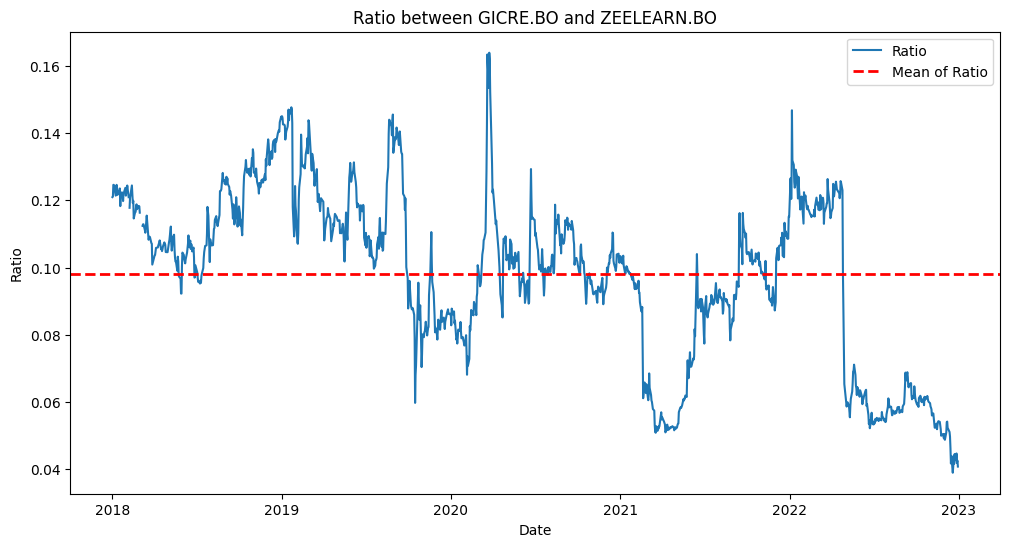

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression

def calculate_ratio(stock1, stock2, start, end):
    data1 = yf.download(stock1, start=start, end=end)['Adj Close']
    data2 = yf.download(stock2, start=start, end=end)['Adj Close']
    ratio = data2.dropna() / data1.dropna()
    return ratio

stock1 = "GICRE.BO"
stock2 = "ZEELEARN.BO"
start = "2018-01-01"
end = "2023-01-01"

ratio = calculate_ratio(stock1, stock2, start, end)

mean_ratio = np.mean(ratio)

plt.figure(figsize=(12, 6))
plt.plot(ratio, label='Ratio')
plt.axhline(mean_ratio, color='red', linestyle='--', linewidth=2, label='Mean of Ratio')
plt.title(f'Ratio between {stock1} and {stock2}')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()




CALCULATING Z-SCORE TO NORMALISE THE RATIOS

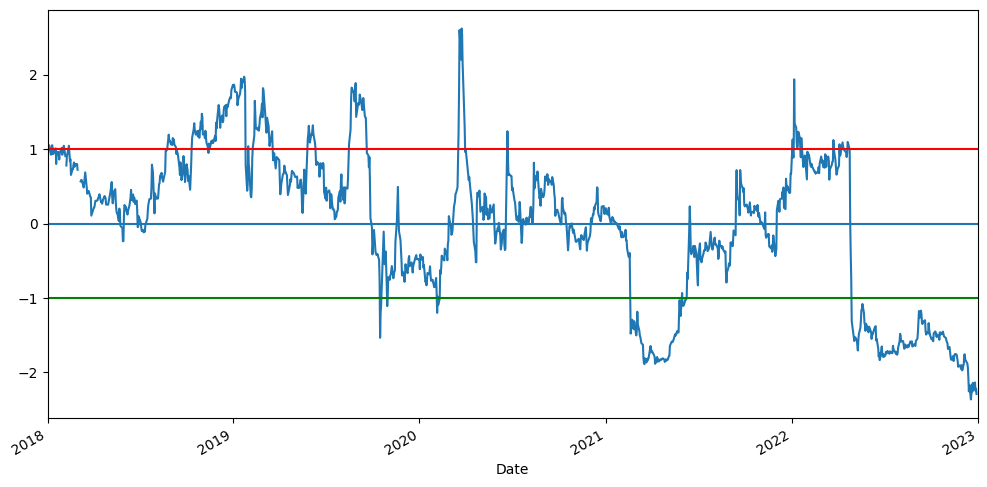

In [9]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.xlim('2018-01-01', '2023-01-01')
plt.show()

CALCULATION Z-SCORE USING 5-DAY AND 60-DAY MOVING AVERAGES (MA)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


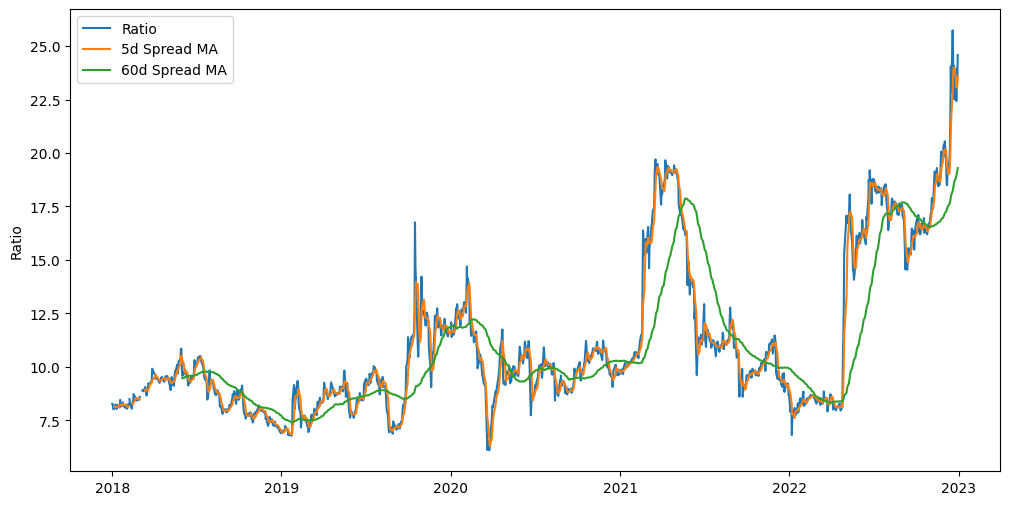

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

gicre_data = yf.download('GICRE.BO', start='2018-01-01', end='2023-01-01')
zeelearn_data = yf.download('ZEELEARN.BO', start='2018-01-01', end='2023-01-01')

gicre_prices = gicre_data['Adj Close']
zeelearn_prices = zeelearn_data['Adj Close']

ratio= (gicre_prices/zeelearn_prices)

spread_mavg5 = ratio.rolling(window=5, center=False).mean()
spread_mavg60 = ratio.rolling(window=60, center=False).mean()

std_60 = ratio.rolling(window=60, center=False).std()

zscore_60_5 = (spread_mavg5 - spread_mavg60) / std_60

plt.figure(figsize=(12, 6))
plt.plot(ratio.index, ratio.values)
plt.plot(spread_mavg5.index, spread_mavg5.values)
plt.plot(spread_mavg60.index, spread_mavg60.values)
plt.legend(['Ratio', '5d Spread MA', '60d Spread MA'])

plt.ylabel('Ratio')
plt.show()


PLOTTING GRAPH OF Z-SCORE TO CHECK BOUNDS

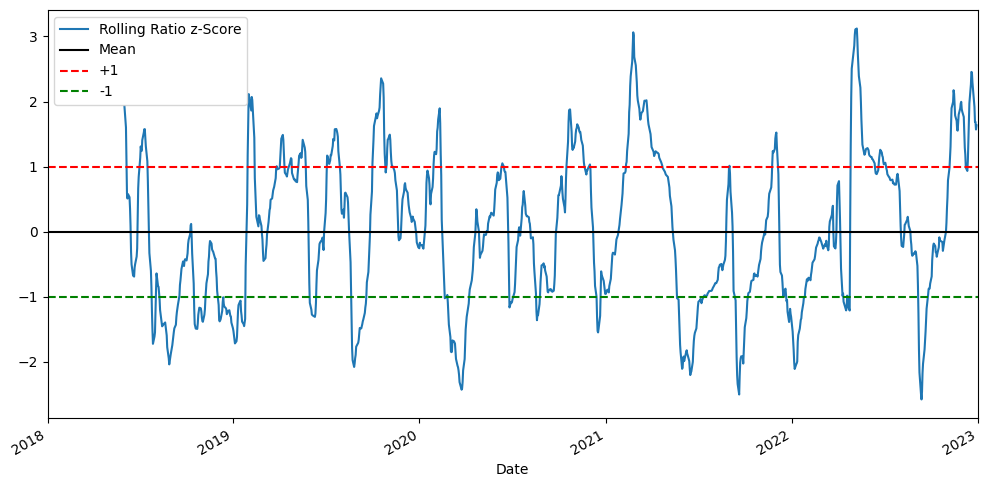

In [11]:

plt.figure(figsize=(12, 6))
zscore_60_5.plot()
plt.xlim('2018-01-01', '2023-01-01')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()


DEFINING BUY & SELL SIGNALS ON Z-SCORE VALUES

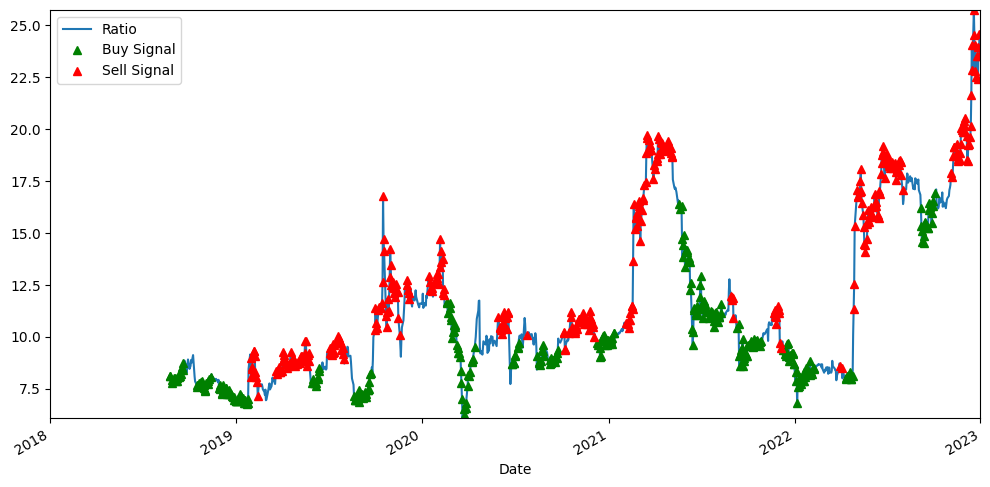

In [16]:

plt.figure(figsize=(12, 6))
ratio[160:].plot()  
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_60_5 > -0.6] = 0
sell[zscore_60_5 < 0.6] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')  
sell[160:].plot(color='r', linestyle='None', marker='^')  
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.xlim('2018-01-01', '2023-01-01')  
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()


SELL & BUY SIGNALS ON INDUVIDUAL STOCKS

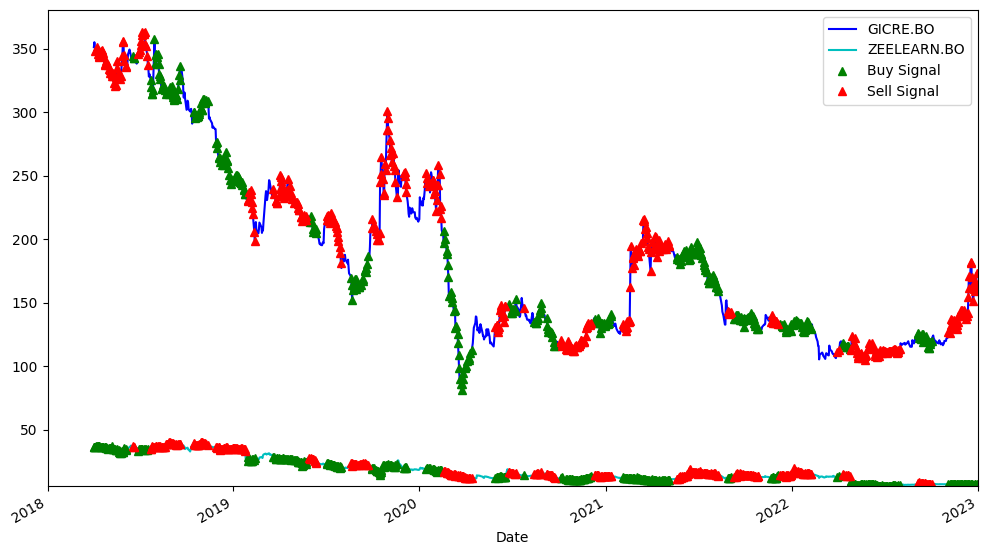

In [17]:

plt.figure(figsize=(12,7))

gicre_prices[60:].plot(color='b')
zeelearn_prices[60:].plot(color='c')

buyR = pd.Series(0, index=gicre_prices.index)
sellR = pd.Series(0, index=zeelearn_prices.index)

buyR[buy != 0] = gicre_prices[buy != 0]
sellR[buy != 0] = zeelearn_prices[buy != 0]

buyR[sell != 0] = zeelearn_prices[sell != 0]
sellR[sell != 0] = gicre_prices[sell != 0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(gicre_prices.min(), zeelearn_prices.min()), max(gicre_prices.max(), zeelearn_prices.max())))
plt.xlim('2018-01-01', '2023-01-01')

plt.legend(['GICRE.BO', 'ZEELEARN.BO', 'Buy Signal', 'Sell Signal'])
plt.show()


# **COMPILING THE FINAL STARTEGY**

In [18]:
def trade_strategy(start, end, window1, window2):
    import yfinance as yf
    import matplotlib.pyplot as plt
    import pandas as pd

    gicre_data = yf.download('GICRE.BO', start, end)
    zeelearn_data = yf.download('ZEELEARN.BO', start, end)

    gicre_prices = gicre_data['Adj Close']
    zeelearn_prices = zeelearn_data['Adj Close']

    ratio = (zeelearn_prices / gicre_prices)

    ratio_mavg5 = ratio.rolling(window=5, center=False).mean()
    ratio_mavg60 = ratio.rolling(window=60, center=False).mean()
    std_60 = ratio.rolling(window=60, center=False).std()
    zscore_60_5 = (ratio_mavg5 - ratio_mavg60) / std_60

    plt.figure(figsize=(12, 6))
    ratio[160:].plot()
    buy = ratio.copy()
    sell = ratio.copy()
    buy[zscore_60_5 > -0.6] = 0
    sell[zscore_60_5 < 0.6] = 0
    buy[160:].plot(color='g', linestyle='None', marker='^')
    sell[160:].plot(color='r', linestyle='None', marker='^')
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, ratio.min(), ratio.max()))
    plt.xlim(start, end)
    plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
    plt.show()

    plt.figure(figsize=(12, 7))
    gicre_prices[60:].plot(color='b')
    zeelearn_prices[60:].plot(color='c')

    buyR = pd.Series(0, index=gicre_prices.index)
    sellR = pd.Series(0, index=gicre_prices.index)

    buyR[buy != 0] = gicre_prices[buy != 0]
    sellR[buy != 0] = zeelearn_prices[buy != 0]

    buyR[sell != 0] = zeelearn_prices[sell != 0]
    sellR[sell != 0] = gicre_prices[sell != 0]

    buyR[60:].plot(color='g', linestyle='None', marker='^')
    sellR[60:].plot(color='r', linestyle='None', marker='^')

    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, min(gicre_prices.min(), zeelearn_prices.min()), max(gicre_prices.max(), zeelearn_prices.max())))
    plt.xlim(start, end)

    plt.legend(['GICRE', 'ZEELEARN', 'Buy Signal', 'Sell Signal'])
    plt.show()

    def trade(gicre_prices, zeelearn_prices, window1, window2):
        if (window1 == 0) or (window2 == 0):
            return 0
        
        ratio = zeelearn_prices / gicre_prices
        ma1 = ratio.rolling(window=window1, center=False).mean()
        ma2 = ratio.rolling(window=window2, center=False).mean()
        std = ratio.rolling(window=window2, center=False).std()
        zscore = (ma1 - ma2) / std
        
        money = 100
        count_zeelearn = 0
        count_gicre = 0
        returns = []
        
        for i in range(len(ratio)):
            if zscore[i] < -0.6:
                if i < len(gicre_prices) and i < len(zeelearn_prices):
                    money += gicre_prices[i] - zeelearn_prices[i]
                    count_gicre -= 1
                    count_zeelearn += 1
                    returns.append((gicre_prices[i] - zeelearn_prices[i]) / zeelearn_prices[i])
            elif zscore[i] > 0.6:
                if i < len(gicre_prices) and i < len(zeelearn_prices):
                    money -= gicre_prices[i] - zeelearn_prices[i]
                    count_gicre += 1
                    count_zeelearn -= 1
                    returns.append((gicre_prices[i] - zeelearn_prices[i]) / zeelearn_prices[i])
            elif abs(zscore[i]) < 0.25:
                if i < len(gicre_prices) and i < len(zeelearn_prices):
                    money += gicre_prices[i] * count_gicre + zeelearn_prices[i] * count_zeelearn
                    count_gicre = 0
                    count_zeelearn = 0
                    returns.append(0)
                
        return money, returns

    final, returns = trade(gicre_prices, zeelearn_prices, window1, window2)

    profit_percentage = (final - 100) / 100
    print("Profitability: Profit percentage: {:.2f}".format(profit_percentage),"%")
    
    import numpy as np

    returns = np.array(returns)
    monthly_returns = np.mean(returns)  
    std_dev = np.std(returns)

    sharpe_ratio = (monthly_returns - 0) / std_dev if std_dev != 0 else 0

    print("Risk adjusted returns: Sharpe Ratio: {:.2f}".format(sharpe_ratio))
    print("Consistency: Standard Deviation: {:.2f}".format(std_dev))



# **FREQUENCY OF TRADING**

In [20]:
def trade_strategy_freq(start, end, window1, window2, frequency):
    import yfinance as yf
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    intervals = {
        '1d': '1d',   
        '1wk': '1wk',   
        '5d': '5d',  
        
    }
    
    if frequency not in intervals:
        raise ValueError("Frequency must be one of: '1d', '1wk','5d'")

    gicre_data = yf.download('GICRE.BO', start=start, end=end, interval=intervals[frequency])
    zeelearn_data = yf.download('ZEELEARN.BO', start=start, end=end, interval=intervals[frequency])

    gicre_prices = gicre_data['Adj Close']
    zeelearn_prices = zeelearn_data['Adj Close']

    ratio = zeelearn_prices / gicre_prices

    ratio_mavg1 = ratio.rolling(window=window1).mean()
    ratio_mavg2 = ratio.rolling(window=window2).mean()
    std_2 = ratio.rolling(window=window2).std()
    zscore = (ratio_mavg1 - ratio_mavg2) / std_2

    plt.figure(figsize=(12, 6))
    ratio.plot()
    buy = ratio.copy()
    sell = ratio.copy()
    buy[zscore > -0.6] = 0
    sell[zscore < 0.6] = 0
    buy.plot(color='g', linestyle='None', marker='^')
    sell.plot(color='r', linestyle='None', marker='v')
    plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
    plt.show()

    plt.figure(figsize=(12, 7))
    gicre_prices.plot(color='b')
    zeelearn_prices.plot(color='c')

    buyR = pd.Series(0, index=gicre_prices.index)
    sellR = pd.Series(0, index=gicre_prices.index)

    buyR[buy != 0] = gicre_prices[buy != 0]
    sellR[buy != 0] = zeelearn_prices[buy != 0]

    buyR[sell != 0] = zeelearn_prices[sell != 0]
    sellR[sell != 0] = gicre_prices[sell != 0]

    buyR.plot(color='g', linestyle='None', marker='^')
    sellR.plot(color='r', linestyle='None', marker='v')

    plt.legend(['GICRE', 'ZEELEARN', 'Buy Signal', 'Sell Signal'])
    plt.show()

    def trade(gicre_prices, zeelearn_prices, window1, window2):
        if (window1 == 0) or (window2 == 0):
            return 0
        
        ratio = zeelearn_prices / gicre_prices
        ma1 = ratio.rolling(window=window1).mean()
        ma2 = ratio.rolling(window=window2).mean()
        std = ratio.rolling(window=window2).std()
        zscore = (ma1 - ma2) / std
        
        money = 100
        count_zeelearn = 0
        count_gicre = 0
        returns = []
        
        for i in range(len(ratio)):
            if zscore[i] < -0.6:
                if i < len(gicre_prices) and i < len(zeelearn_prices):
                    money += gicre_prices[i] - zeelearn_prices[i]
                    count_gicre -= 1
                    count_zeelearn += 1
                    returns.append((gicre_prices[i] - zeelearn_prices[i]) / zeelearn_prices[i])
            elif zscore[i] > 0.6:
                if i < len(gicre_prices) and i < len(zeelearn_prices):
                    money -= gicre_prices[i] - zeelearn_prices[i]
                    count_gicre += 1
                    count_zeelearn -= 1
                    returns.append((gicre_prices[i] - zeelearn_prices[i]) / zeelearn_prices[i])
            elif abs(zscore[i]) < 0.25:
                if i < len(gicre_prices) and i < len(zeelearn_prices):
                    money += gicre_prices[i] * count_gicre + zeelearn_prices[i] * count_zeelearn
                    count_gicre = 0
                    count_zeelearn = 0
                    returns.append(0)
                
        return money, returns

    final, returns = trade(gicre_prices, zeelearn_prices, window1, window2)

    profit_percentage = (final - 100) / 100
    print("Profitability: Profit percentage: {:.2f}%".format(profit_percentage))

    returns = np.array(returns)
    monthly_returns = np.mean(returns)
    std_dev = np.std(returns)
    sharpe_ratio = (monthly_returns - 0) / std_dev if std_dev != 0 else 0

    print("Risk adjusted returns: Sharpe Ratio: {:.2f}".format(sharpe_ratio))
    print("Consistency: Standard Deviation: {:.2f}".format(std_dev))


**-> backTesting.ipynb**